In [1]:
#Installing dependencies
# !pip install wordcloud
# !pip install fileupload
# !pip install ipywidgets
# !jupyter nbextension install --py --user fileupload
# !jupyter nbextension enable --py fileupload

In [61]:
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [62]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `fox_cdc_news_article.txt` (3.44 kB)


In [78]:
# Text copied from https://www.foxnews.com/health/cdc-director-covid-induced-impending-doom-rise-cases-hospitalizations
with open('fox_cdc_news_article.txt') as file:
    text = file.read()
    #print(text)
text[:100]

'Centers for Disease Control and Prevention (CDC) Director Dr. Rochelle Walensky during a White House'

In [75]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "in", "for", "on", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    rmv_punc = [''.join([l.lower() for l in j if \
    (ord(l.lower()) >= 97 and ord(l.lower())<=122)])\
    for j in text.split()]
    rmv_stp_wrds = list(filter(lambda x: x not in uninteresting_words, rmv_punc))
    w_dict = {i:rmv_stp_wrds.count(i) for i in rmv_stp_wrds}
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(w_dict)
    return cloud.to_array()

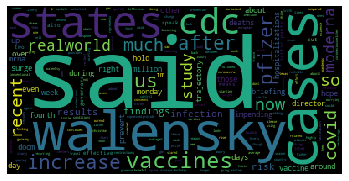

In [76]:
# Display your wordcloud image

myimage = calculate_frequencies(text)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()